In [18]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
%matplotlib inline
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [19]:
#!pip3 install torch torchvision torchaudio 
#!pip install pyyaml

In [20]:
img=cv2.imread('./images/kitchentalk2.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #convert BGR color scheme to RGB 
img.shape

(1060, 1884, 3)

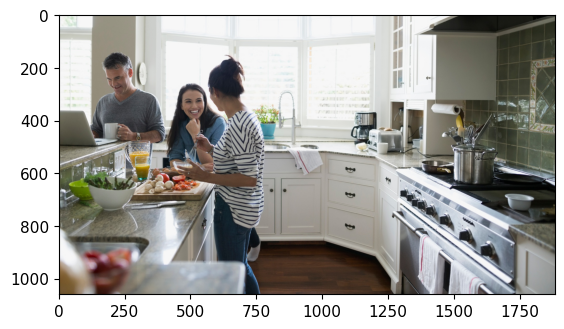

In [21]:
plt.imshow(img)

In [14]:
model=torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in C:\Users\nidhi/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-2-16 Python-3.8.10 torch-2.0.0+cpu CPU

100%|█████████████████████████████████████████████████████████████████████████████| 14.1M/14.1M [00:01<00:00, 12.5MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [16]:
results=model(img)
results.print()

image 1/1: 1060x1884 4 persons, 2 cups, 4 bowls, 1 potted plant, 1 dining table, 1 laptop, 1 oven, 1 sink
Speed: 15.0ms pre-process, 531.4ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)


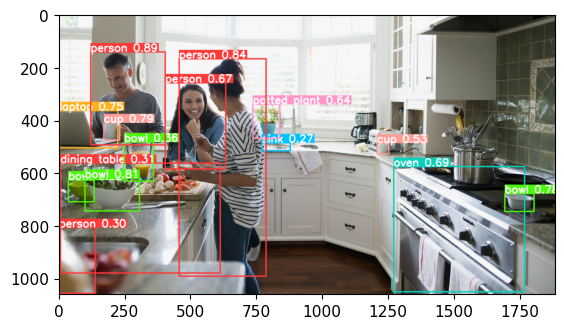

In [17]:
plt.imshow(np.squeeze(results.render()))
plt.show()

In [22]:
results.xyxy[0].cpu().detach().numpy()

array([[     120.85,      143.86,      403.11,      495.17,     0.88728,           0],
       [     456.03,      169.74,      786.69,      992.74,     0.83558,           0],
       [     98.117,      621.55,      305.79,      745.79,     0.80598,          45],
       [     170.83,      411.31,      230.34,      477.57,     0.78877,          41],
       [     1693.7,      679.49,        1804,      747.45,     0.78044,          45],
       [     1.2682,      365.73,      223.75,      506.67,     0.74992,          63],
       [     1271.7,       577.4,      1768.6,      1051.3,       0.691,          69],
       [     403.94,      260.76,      633.84,      586.45,     0.66511,           0],
       [     736.18,      341.41,      838.73,      470.62,      0.6442,          58],
       [     1208.2,      488.62,      1252.7,       529.3,     0.52545,          41],
       [     35.217,      628.16,      133.38,      710.65,     0.52488,          45],
       [     247.84,       484.7,      358.

In [27]:
xyxy=results.pandas().xyxy[0]
xyxy

,xmin,ymin,xmax,ymax,confidence,class,name
0,120.845360,143.863449,403.111877,495.168427,0.887279,0,person
1,456.029297,169.743912,786.690979,992.735962,0.835580,0,person
2,98.116508,621.551453,305.791687,745.788269,0.805982,45,bowl
3,170.828873,411.309753,230.340866,477.568817,0.788771,41,cup
4,1693.662842,679.488098,1804.012085,747.450684,0.780435,45,bowl
5,1.268194,365.734833,223.748993,506.671112,0.749915,63,laptop
6,1271.676147,577.398926,1768.564697,1051.299194,0.691002,69,oven
7,403.943237,260.760315,633.840393,586.448975,0.665109,0,person
8,736.183533,341.409393,838.734619,470.615204,0.644202,58,potted plant
9,1208.240112,488.619110,1252.702759,529.298523,0.525452,41,cup


person


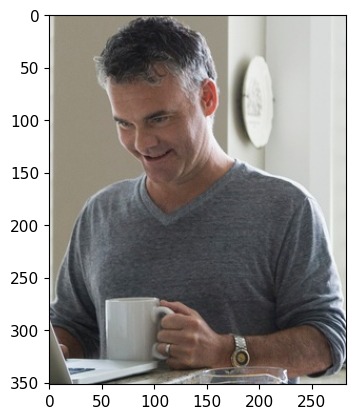

person


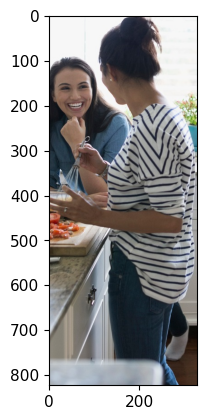

bowl


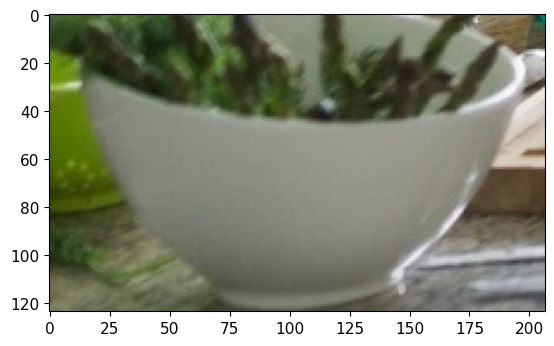

cup


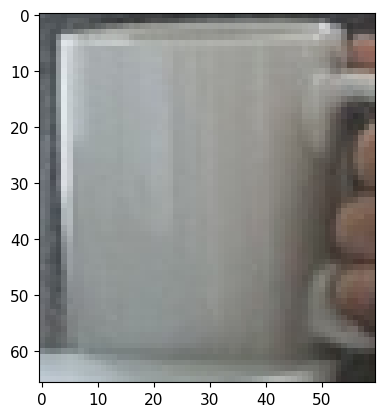

bowl


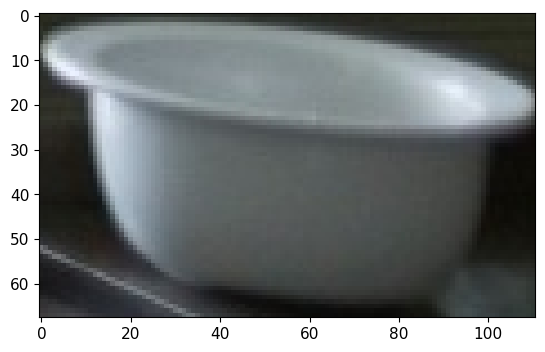

laptop


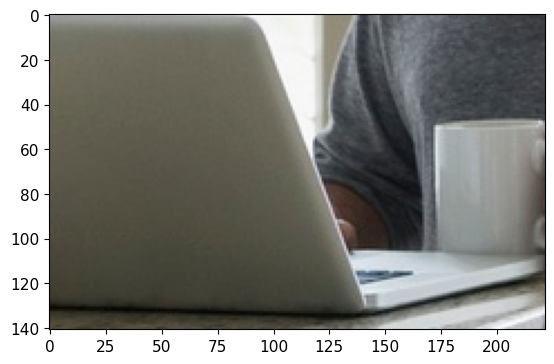

oven


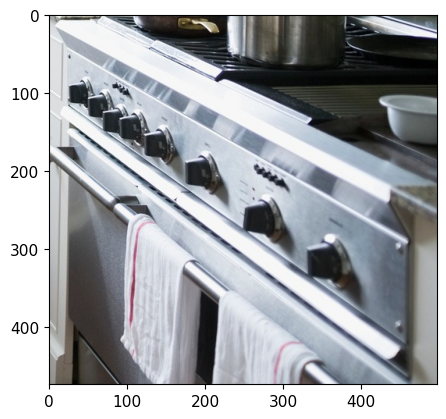

person


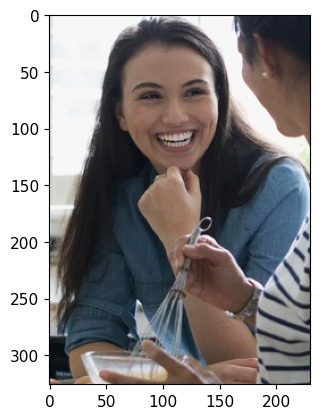

potted plant


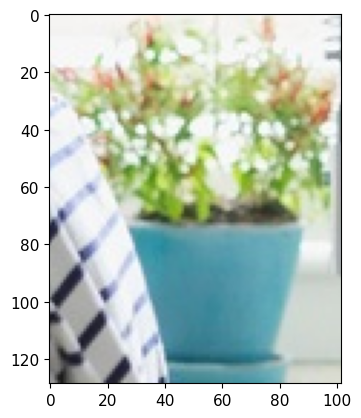

cup


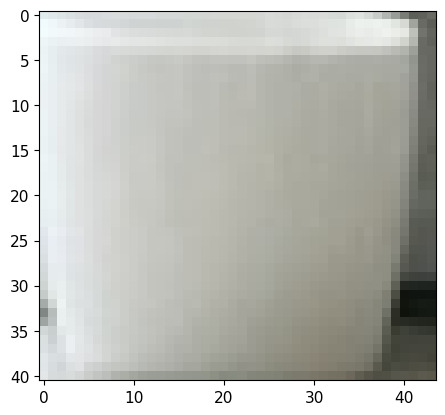

bowl


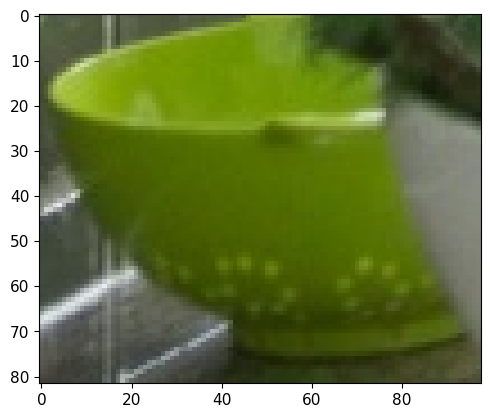

bowl


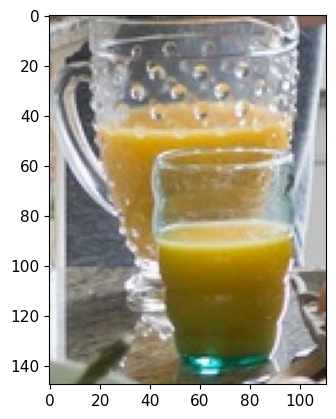

dining table


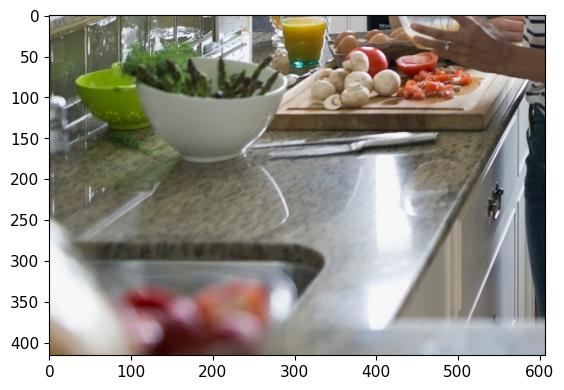

person


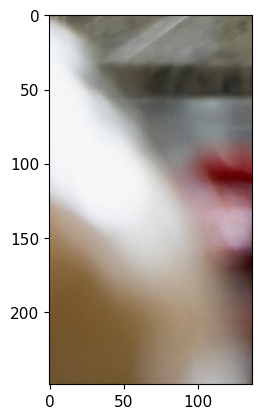

sink


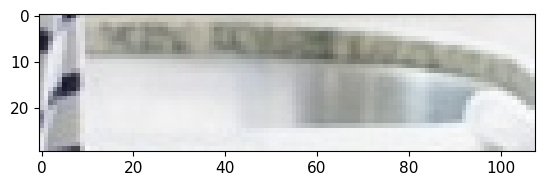

In [26]:
for i in range(len(xyxy)):
    print(xyxy['name'][i])
    plt.imshow(img[int(xyxy['ymin'][i]):int(xyxy['ymax'][i]),int(xyxy['xmin'][i]):int(xyxy['xmax'][i])])
    
    plt.show()